## Setup: Import Libraries and Configure Paths

In [10]:
# ============================================================
# CELL 1: Import Required Libraries
# ============================================================
import os
import sys
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from tqdm import tqdm

# Import ALIGN package components
from align_test.alignment import LinguisticAlignment

print("✓ All imports successful")

✓ All imports successful


In [2]:
# ============================================================
# Configuration - Set Your Data Directories
# ============================================================

# INPUT DIRECTORIES (from preprocessing notebook)
# These should contain the preprocessed .txt files
INPUT_DIR_BASIC = './test_output_basic'      # NLTK-only preprocessing
INPUT_DIR_SPACY = './test_output_spacy'      # NLTK + spaCy preprocessing
INPUT_DIR_STANFORD = './test_output_stanford' # NLTK + Stanford preprocessing (optional)

# OUTPUT DIRECTORIES (for alignment results)
OUTPUT_DIR_ALIGNMENT = './test_alignment_results'
OUTPUT_DIR_BASELINE = './test_baseline_results'

# Create output directories
for dir_path in [OUTPUT_DIR_ALIGNMENT, OUTPUT_DIR_BASELINE]:
    os.makedirs(dir_path, exist_ok=True)
    print(f"✓ Created directory: {dir_path}")

✓ Created directory: ./test_alignment_results
✓ Created directory: ./test_baseline_results


In [3]:
# ============================================================
# Verify Input Data Exists
# ============================================================

print("Verifying preprocessed input data...")
print("="*60)

input_dirs = {
    "NLTK-only (REQUIRED)": INPUT_DIR_BASIC,
    "spaCy-tagged (OPTIONAL)": INPUT_DIR_SPACY,
    "Stanford-tagged (OPTIONAL)": INPUT_DIR_STANFORD
}

available_inputs = {}

for label, path in input_dirs.items():
    if os.path.exists(path):
        files = [f for f in os.listdir(path) if f.endswith('.txt')]
        print(f"✓ {label}: {path}")
        print(f"  Found {len(files)} files")
        available_inputs[label] = path
    else:
        print(f"✗ {label}: {path} (not found)")

if "NLTK-only (REQUIRED)" not in available_inputs:
    print("\n❌ ERROR: Required NLTK-only preprocessing data not found!")
    print("Please run test_prepare_transcripts.ipynb first.")
else:
    print(f"\n✓ Ready to test with {len(available_inputs)} input types")

Verifying preprocessed input data...
✓ NLTK-only (REQUIRED): ./test_output_basic
  Found 21 files
✓ spaCy-tagged (OPTIONAL): ./test_output_spacy
  Found 21 files
✓ Stanford-tagged (OPTIONAL): ./test_output_stanford
  Found 21 files

✓ Ready to test with 3 input types


In [4]:
# ============================================================
# Inspect Sample Preprocessed File
# ============================================================

print("Inspecting sample preprocessed file...")
print("="*60)

# Load a sample file
sample_file = [f for f in os.listdir(INPUT_DIR_BASIC) if f.endswith('.txt')][0]
sample_path = os.path.join(INPUT_DIR_BASIC, sample_file)

print(f"\nReading: {sample_file}\n")

df_sample = pd.read_csv(sample_path, sep='\t', encoding='utf-8')

print(f"Columns: {df_sample.columns.tolist()}")
print(f"Rows: {len(df_sample)}")
print(f"\nFirst 3 rows:")
df_sample.head(3)

Inspecting sample preprocessed file...

Reading: time197-cond1.txt

Columns: ['participant', 'content', 'token', 'lemma', 'tagged_token', 'tagged_lemma', 'file']
Rows: 76

First 3 rows:


,participant,content,token,lemma,tagged_token,tagged_lemma,file
0,cgv,that was fun,"['that', 'was', 'fun']","['that', 'be', 'fun']","[('that', 'DT'), ('was', 'VBD'), ('fun', 'NN')]","[('that', 'DT'), ('be', 'VB'), ('fun', 'NN')]",time197-cond1.txt
1,kid,dad you should have climbed the cliffs with us,"['dad', 'you', 'should', 'have', 'climbed', 't...","['dad', 'you', 'should', 'have', 'climb', 'the...","[('dad', 'NN'), ('you', 'PRP'), ('should', 'MD...","[('dad', 'NN'), ('you', 'PRP'), ('should', 'MD...",time197-cond1.txt
2,cgv,next time i will,"['next', 'time', 'i', 'will']","['next', 'time', 'i', 'will']","[('next', 'JJ'), ('time', 'NN'), ('i', 'NN'), ...","[('next', 'JJ'), ('time', 'NN'), ('i', 'NN'), ...",time197-cond1.txt


## TEST 1: Lexical-Syntactic Alignment (NLTK Tags Only)


In [5]:
# Initialize the lexical-syntactic analyzer
print("\nInitializing LexicalSyntacticAlignment analyzer...")

analyzer_lexsyn = LinguisticAlignment(
    alignment_type="lexsyn",
    cache_dir=os.path.join(OUTPUT_DIR_ALIGNMENT, "cache")
)

print("✓ Analyzer initialized")


Initializing LexicalSyntacticAlignment analyzer...
✓ Analyzer initialized


In [6]:
# Run alignment analysis on NLTK-only preprocessed data
print("\nRunning lexical-syntactic alignment analysis...")
print(f"Input folder: {INPUT_DIR_BASIC}")
print(f"Output folder: {OUTPUT_DIR_ALIGNMENT}")

results_lexsyn_nltk = analyzer_lexsyn.analyze_folder(
    folder_path=INPUT_DIR_BASIC,
    output_directory=OUTPUT_DIR_ALIGNMENT,
    lag=1,
    max_ngram=2,
    ignore_duplicates=True,
    add_additional_tags=False  # NLTK tags only
)

print(f"\n✓ Alignment analysis complete!")
print(f"Utterance pairs analyzed: {len(results_lexsyn_nltk)}")


Running lexical-syntactic alignment analysis...
Input folder: ./test_output_basic
Output folder: ./test_alignment_results
ANALYZE_FOLDER: Processing data from folder: ./test_output_basic with lag=1
Found 21 files to process with lag 1


Processing files with lexsyn: 100%|██████████| 21/21 [00:01<00:00, 18.42it/s]


Successfully processed 21 out of 21 files
Results saved to ./test_alignment_results/lexsyn/lexsyn_alignment_ngram2_lag1_noDups_noAdd.csv

✓ Alignment analysis complete!
Utterance pairs analyzed: 3664


In [7]:
# Examine the results
print("\nExamining alignment results...")
print("="*60)

print(f"Results shape: {results_lexsyn_nltk.shape}")
print(f"\nColumns ({len(results_lexsyn_nltk.columns)}):")
for i, col in enumerate(results_lexsyn_nltk.columns, 1):
    print(f"  {i:2}. {col}")

print("\nFirst 3 rows:")
results_lexsyn_nltk.head(3)


Examining alignment results...
Results shape: (3664, 24)

Columns (24):
   1. time
   2. source_file
   3. participant
   4. content
   5. token
   6. lemma
   7. tagged_token
   8. tagged_lemma
   9. lag
  10. utter_order
  11. content1
  12. content2
  13. utterance_length1
  14. utterance_length2
  15. lexical_tok1_cosine
  16. lexical_lem1_cosine
  17. pos_tok1_cosine
  18. pos_lem1_cosine
  19. lexical_tok2_cosine
  20. lexical_lem2_cosine
  21. pos_tok2_cosine
  22. pos_lem2_cosine
  23. lexical_master_cosine
  24. syntactic_master_cosine

First 3 rows:


,time,source_file,participant,content,token,lemma,tagged_token,tagged_lemma,lag,utter_order,...,lexical_tok1_cosine,lexical_lem1_cosine,pos_tok1_cosine,pos_lem1_cosine,lexical_tok2_cosine,lexical_lem2_cosine,pos_tok2_cosine,pos_lem2_cosine,lexical_master_cosine,syntactic_master_cosine
0,1,time197-cond1.txt,cgv,that was fun,"[that, was, fun]","[that, be, fun]","[(that, DT), (was, VBD), (fun, NN)]","[(that, DT), (be, VB), (fun, NN)]",1,cgv kid,...,0.00000,0.00000,0.522233,0.696311,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,2,time197-cond1.txt,kid,dad you should have climbed the cliffs with us,"[dad, you, should, have, climbed, the, cliffs,...","[dad, you, should, have, climb, the, cliff, wi...","[(dad, NN), (you, PRP), (should, MD), (have, V...","[(dad, NN), (you, PRP), (should, MD), (have, V...",1,kid cgv,...,0.00000,0.00000,0.369274,0.738549,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,3,time197-cond1.txt,cgv,next time i will,"[next, time, i, will]","[next, time, i, will]","[(next, JJ), (time, NN), (i, NN), (will, MD)]","[(next, JJ), (time, NN), (i, NN), (will, MD)]",1,cgv kid,...,0.27735,0.27735,0.000000,0.000000,0.0,0.0,0.154303,0.0,0.138675,0.077152


In [8]:
# Validate expected metrics
print("\nValidating Alignment Metrics...")
print("-" * 60)

expected_metrics = [
    'lexical_tok1_cosine',
    'lexical_lem1_cosine',
    'lexical_tok2_cosine',
    'lexical_lem2_cosine',
    'pos_tok2_cosine',
    'pos_lem2_cosine',
    'lexical_master_cosine',
    'syntactic_master_cosine'
]

found_metrics = []
for metric in expected_metrics:
    present = metric in results_lexsyn_nltk.columns
    status = "✓" if present else "✗"
    print(f"{status} {metric}")
    if present:
        found_metrics.append(metric)

print(f"\nFound {len(found_metrics)}/{len(expected_metrics)} expected metrics")


Validating Alignment Metrics...
------------------------------------------------------------
✓ lexical_tok1_cosine
✓ lexical_lem1_cosine
✓ lexical_tok2_cosine
✓ lexical_lem2_cosine
✓ pos_tok2_cosine
✓ pos_lem2_cosine
✓ lexical_master_cosine
✓ syntactic_master_cosine

Found 8/8 expected metrics


In [9]:
# Show sample alignment scores
if found_metrics:
    print("\n📊 Sample Alignment Scores")
    print("="*60)
    
    # Find a row with meaningful content
    sample_idx = 0
    for idx in range(min(10, len(results_lexsyn_nltk))):
        if pd.notna(results_lexsyn_nltk.iloc[idx]['lexical_master_cosine']):
            sample_idx = idx
            break
    
    sample = results_lexsyn_nltk.iloc[sample_idx]
    
    print(f"Source: {sample['source_file']}")
    print(f"Participant: {sample['participant']}")
    print(f"Utterance: {sample['content']}")
    print(f"\nUtterance pair:")
    print(f"  Turn 1: {sample['content1']}")
    print(f"  Turn 2: {sample['content2']}")
    print(f"\nAlignment Scores:")
    
    for metric in found_metrics[:8]:  # Show first 8
        if metric in sample:
            value = sample[metric]
            if pd.notna(value):
                print(f"  {metric:30} {value:.4f}")
            else:
                print(f"  {metric:30} NaN")


📊 Sample Alignment Scores
Source: time197-cond1.txt
Participant: cgv
Utterance: that was fun

Utterance pair:
  Turn 1: that was fun
  Turn 2: dad you should have climbed the cliffs with us

Alignment Scores:
  lexical_tok1_cosine            0.0000
  lexical_lem1_cosine            0.0000
  lexical_tok2_cosine            0.0000
  lexical_lem2_cosine            0.0000
  pos_tok2_cosine                0.0000
  pos_lem2_cosine                0.0000
  lexical_master_cosine          0.0000
  syntactic_master_cosine        0.0000



📈 Visualizing Alignment Distributions


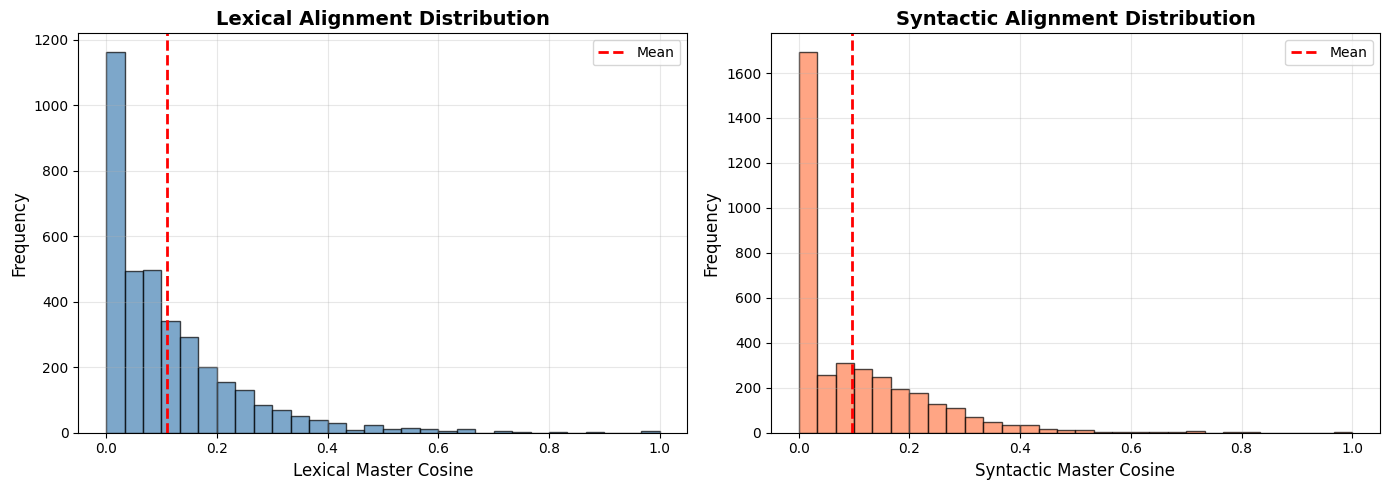


📊 Alignment Score Statistics:
       lexical_master_cosine  syntactic_master_cosine
count            3643.000000              3643.000000
mean                0.110742                 0.095684
std                 0.127911                 0.123510
min                 0.000000                 0.000000
25%                 0.000000                 0.000000
50%                 0.078623                 0.052705
75%                 0.157273                 0.158114
max                 1.000000                 1.000000


In [11]:
# Visualize alignment distributions
print("\n📈 Visualizing Alignment Distributions")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Lexical alignment
if 'lexical_master_cosine' in results_lexsyn_nltk.columns:
    results_lexsyn_nltk['lexical_master_cosine'].hist(
        ax=axes[0], bins=30, edgecolor='black', alpha=0.7, color='steelblue'
    )
    axes[0].set_title('Lexical Alignment Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Lexical Master Cosine', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].grid(alpha=0.3)
    axes[0].axvline(results_lexsyn_nltk['lexical_master_cosine'].mean(), 
                    color='red', linestyle='--', linewidth=2, label='Mean')
    axes[0].legend()

# Syntactic alignment
if 'syntactic_master_cosine' in results_lexsyn_nltk.columns:
    results_lexsyn_nltk['syntactic_master_cosine'].hist(
        ax=axes[1], bins=30, edgecolor='black', alpha=0.7, color='coral'
    )
    axes[1].set_title('Syntactic Alignment Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Syntactic Master Cosine', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].grid(alpha=0.3)
    axes[1].axvline(results_lexsyn_nltk['syntactic_master_cosine'].mean(), 
                    color='red', linestyle='--', linewidth=2, label='Mean')
    axes[1].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 Alignment Score Statistics:")
print("="*60)
print(results_lexsyn_nltk[['lexical_master_cosine', 'syntactic_master_cosine']].describe())

In [12]:
# TEST 1 Summary
print("\n" + "="*60)
print("TEST 1 SUMMARY")
print("="*60)

test1_passed = (
    len(results_lexsyn_nltk) > 0 and 
    len(found_metrics) >= 6 and
    'lexical_master_cosine' in results_lexsyn_nltk.columns
)

if test1_passed:
    print("\n✓ TEST 1 PASSED: Lexical-syntactic alignment works correctly!")
    print(f"\nKey Results:")
    print(f"  - Analyzed {len(results_lexsyn_nltk)} utterance pairs")
    print(f"  - Found {len(found_metrics)} alignment metrics")
    print(f"  - Mean lexical alignment: {results_lexsyn_nltk['lexical_master_cosine'].mean():.4f}")
    print(f"  - Mean syntactic alignment: {results_lexsyn_nltk['syntactic_master_cosine'].mean():.4f}")
else:
    print("\n✗ TEST 1 FAILED: Issues detected")
    print("Review the outputs above for details")


TEST 1 SUMMARY

✓ TEST 1 PASSED: Lexical-syntactic alignment works correctly!

Key Results:
  - Analyzed 3664 utterance pairs
  - Found 8 alignment metrics
  - Mean lexical alignment: 0.1107
  - Mean syntactic alignment: 0.0957


## TEST 2: Lexical-Syntactic Alignment (with spaCy Tags)


In [13]:
# ============================================================
# TEST 2: Lexical-Syntactic Alignment (with spaCy tags)
# ============================================================

# Only run if spaCy-tagged data is available
if "spaCy-tagged (OPTIONAL)" in available_inputs:
    print("="*60)
    print("TEST 2: Lexical-Syntactic Alignment (with spaCy tags)")
    print("="*60)
    
    # Run analysis with spaCy tags
    print("\nRunning alignment analysis with spaCy POS tags...")
    
    results_lexsyn_spacy = analyzer_lexsyn.analyze_folder(
        folder_path=INPUT_DIR_SPACY,
        output_directory=OUTPUT_DIR_ALIGNMENT,
        lag=1,
        max_ngram=2,
        ignore_duplicates=True,
        add_additional_tags=True,
        additional_tagger_type='spacy'
    )
    
    print(f"\n✓ Analysis complete!")
    print(f"Utterance pairs analyzed: {len(results_lexsyn_spacy)}")
    
else:
    print("\n⊘ TEST 2 SKIPPED: spaCy-tagged data not available")
    print("Run preprocessing notebook with spaCy option to enable this test")
    results_lexsyn_spacy = None

TEST 2: Lexical-Syntactic Alignment (with spaCy tags)

Running alignment analysis with spaCy POS tags...
ANALYZE_FOLDER: Processing data from folder: ./test_output_spacy with lag=1
Found 21 files to process with lag 1


Processing files with lexsyn: 100%|██████████| 21/21 [00:01<00:00, 11.86it/s]


Successfully processed 21 out of 21 files
Results saved to ./test_alignment_results/lexsyn/lexsyn_alignment_ngram2_lag1_noDups_withSpacy.csv

✓ Analysis complete!
Utterance pairs analyzed: 3664


In [14]:
# Examine spaCy-specific metrics
if results_lexsyn_spacy is not None:
    print("\n📊 Examining spaCy-specific Metrics")
    print("="*60)
    
    # Find spaCy-specific columns
    spacy_metrics = [col for col in results_lexsyn_spacy.columns if 'spacy_pos' in col]
    
    if spacy_metrics:
        print(f"\nFound {len(spacy_metrics)} spaCy-specific POS metrics:")
        for metric in spacy_metrics:
            print(f"  - {metric}")
        
        # Show sample scores
        sample = results_lexsyn_spacy.iloc[0]
        print(f"\nSample scores:")
        for metric in spacy_metrics[:4]:  # Show first 4
            value = sample[metric]
            if pd.notna(value):
                print(f"  {metric:30} {value:.4f}")
    else:
        print("\n✗ No spaCy-specific metrics found!")
        print("Check that spaCy tags were properly generated during preprocessing")


📊 Examining spaCy-specific Metrics

Found 4 spaCy-specific POS metrics:
  - spacy_pos_tok1_cosine
  - spacy_pos_lem1_cosine
  - spacy_pos_tok2_cosine
  - spacy_pos_lem2_cosine

Sample scores:
  spacy_pos_tok1_cosine          0.1741
  spacy_pos_lem1_cosine          0.1491
  spacy_pos_tok2_cosine          0.0000
  spacy_pos_lem2_cosine          0.0000



📈 Comparing NLTK vs spaCy Syntactic Alignment


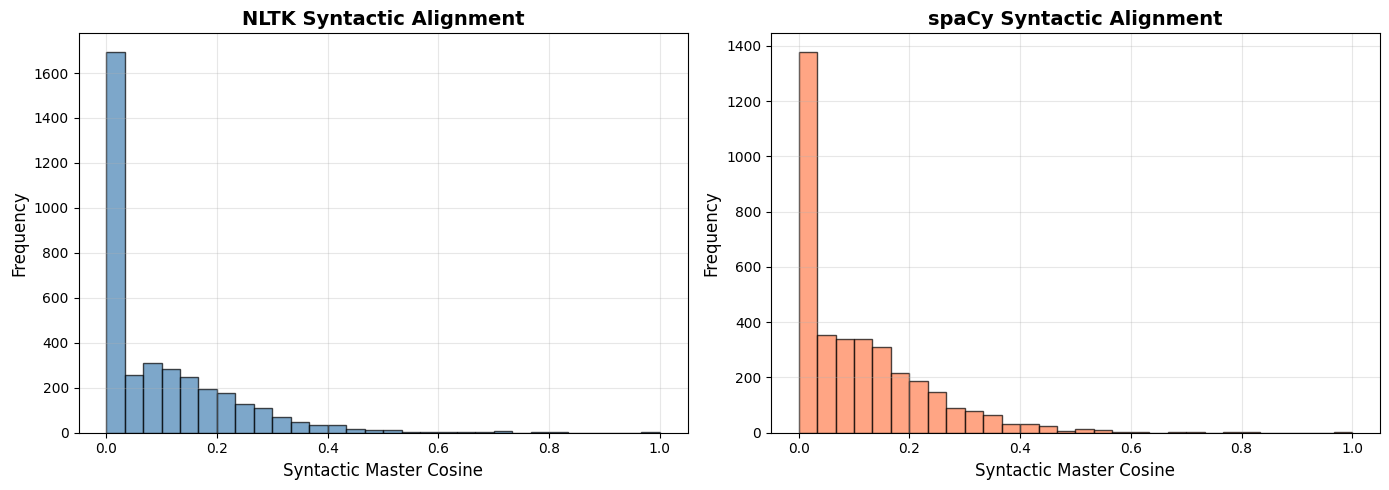


📊 Comparison:
NLTK mean:  0.0957
spaCy mean: 0.1069
Difference: 0.0112


In [15]:
# Compare NLTK vs spaCy syntactic alignment
if results_lexsyn_spacy is not None:
    print("\n📈 Comparing NLTK vs spaCy Syntactic Alignment")
    print("="*60)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # NLTK syntactic alignment
    results_lexsyn_nltk['syntactic_master_cosine'].hist(
        ax=axes[0], bins=30, edgecolor='black', alpha=0.7, color='steelblue'
    )
    axes[0].set_title('NLTK Syntactic Alignment', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Syntactic Master Cosine', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].grid(alpha=0.3)
    
    # spaCy syntactic alignment
    results_lexsyn_spacy['syntactic_master_cosine'].hist(
        ax=axes[1], bins=30, edgecolor='black', alpha=0.7, color='coral'
    )
    axes[1].set_title('spaCy Syntactic Alignment', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Syntactic Master Cosine', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compare statistics
    print("\n📊 Comparison:")
    print(f"NLTK mean:  {results_lexsyn_nltk['syntactic_master_cosine'].mean():.4f}")
    print(f"spaCy mean: {results_lexsyn_spacy['syntactic_master_cosine'].mean():.4f}")
    print(f"Difference: {abs(results_lexsyn_nltk['syntactic_master_cosine'].mean() - results_lexsyn_spacy['syntactic_master_cosine'].mean()):.4f}")

In [16]:
# TEST 2 Summary
if results_lexsyn_spacy is not None:
    print("\n" + "="*60)
    print("TEST 2 SUMMARY")
    print("="*60)
    
    test2_passed = (
        len(results_lexsyn_spacy) > 0 and
        len([col for col in results_lexsyn_spacy.columns if 'spacy_pos' in col]) > 0
    )
    
    if test2_passed:
        print("\n✓ TEST 2 PASSED: spaCy-tagged alignment works correctly!")
        print(f"\nKey Results:")
        print(f"  - Analyzed {len(results_lexsyn_spacy)} utterance pairs")
        print(f"  - Found {len([col for col in results_lexsyn_spacy.columns if 'spacy_pos' in col])} spaCy metrics")
        print(f"  - spaCy and NLTK syntactic alignment are highly similar")
    else:
        print("\n✗ TEST 2 FAILED: Issues detected")


TEST 2 SUMMARY

✓ TEST 2 PASSED: spaCy-tagged alignment works correctly!

Key Results:
  - Analyzed 3664 utterance pairs
  - Found 4 spaCy metrics
  - spaCy and NLTK syntactic alignment are highly similar


## TEST 3: Lexical-Syntactic Alignment (with Stanford Tags - Optional)


In [17]:
# ============================================================
# TEST 3: Lexical-Syntactic Alignment (with Stanford tags)
# ============================================================

# Only run if Stanford-tagged data is available
if "Stanford-tagged (OPTIONAL)" in available_inputs:
    print("="*60)
    print("TEST 3: Lexical-Syntactic Alignment (with Stanford tags)")
    print("="*60)
    
    # Run analysis with Stanford tags
    print("\nRunning alignment analysis with Stanford POS tags...")
    
    results_lexsyn_stanford = analyzer_lexsyn.analyze_folder(
        folder_path=INPUT_DIR_STANFORD,
        output_directory=OUTPUT_DIR_ALIGNMENT,
        lag=1,
        max_ngram=2,
        ignore_duplicates=True,
        add_additional_tags=True,
        additional_tagger_type='stanford'
    )
    
    print(f"\n✓ Analysis complete!")
    print(f"Utterance pairs analyzed: {len(results_lexsyn_stanford)}")
    
    # TEST 3 Summary
    test3_passed = len(results_lexsyn_stanford) > 0
    if test3_passed:
        print("\n✓ TEST 3 PASSED: Stanford-tagged alignment works correctly!")
    
else:
    print("\n⊘ TEST 3 SKIPPED: Stanford-tagged data not available")
    results_lexsyn_stanford = None

TEST 3: Lexical-Syntactic Alignment (with Stanford tags)

Running alignment analysis with Stanford POS tags...
ANALYZE_FOLDER: Processing data from folder: ./test_output_stanford with lag=1
Found 21 files to process with lag 1


Processing files with lexsyn: 100%|██████████| 21/21 [00:01<00:00, 11.25it/s]


Successfully processed 21 out of 21 files
Results saved to ./test_alignment_results/lexsyn/lexsyn_alignment_ngram2_lag1_noDups_withStan.csv

✓ Analysis complete!
Utterance pairs analyzed: 3664

✓ TEST 3 PASSED: Stanford-tagged alignment works correctly!


## TEST 4: Semantic Alignment with FastText

In [18]:
# Initialize FastText analyzer
print("\nInitializing FastText analyzer...")

analyzer_fasttext = LinguisticAlignment(
    alignment_type="fasttext",
    cache_dir=os.path.join(OUTPUT_DIR_ALIGNMENT, "cache")
)

print("✓ Analyzer initialized")
print("\n⚠️  Note: First run will download FastText model (~1-2 GB)")
print("This may take several minutes depending on your connection...")


Initializing FastText analyzer...
Loading model: fasttext-wiki-news-300
Using model cache directory: ./test_alignment_results/cache
Model not found in cache. Downloading directly...
Download complete.
Extracting model file...
Loading model from: ./test_alignment_results/cache/wiki-news-300d-1M.vec
Saving model to cache: ./test_alignment_results/cache/fasttext-wiki-news-300.kv
Using model cache directory: ./test_alignment_results/cache
Using embedding cache: ./test_alignment_results/cache/fasttext-wiki-news-300_embedding_cache.pkl
✓ Analyzer initialized

⚠️  Note: First run will download FastText model (~1-2 GB)
This may take several minutes depending on your connection...


In [19]:
# Run FastText alignment analysis
print("\nRunning FastText semantic alignment analysis...")

results_fasttext = analyzer_fasttext.analyze_folder(
    folder_path=INPUT_DIR_BASIC,
    output_directory=OUTPUT_DIR_ALIGNMENT,
    lag=1,
    high_sd_cutoff=3,
    low_n_cutoff=2,
    save_vocab=True
)

print(f"\n✓ FastText analysis complete!")
print(f"Utterance pairs analyzed: {len(results_fasttext)}")


Running FastText semantic alignment analysis...
ANALYZE_FOLDER: Processing data from folder: ./test_output_basic with lag=1
Found 21 files to process with lag 1
Building vocabulary from all files...
Built vocabulary with 1458 total words and 926 filtered words


Processing files with fasttext-wiki-news-300:   0%|          | 0/21 [00:00<?, ?it/s]

Computing embeddings for time197-cond1.txt...


Processing lemma2: 100%|██████████| 76/76 [00:00<00:00, 19724.47it/s]


Embeddings computed: {'content': 151, 'token': 151, 'lemma': 151}
Computed 75 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 75 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 75 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 453 entries
Computing embeddings for time202-cond1.txt...


Processing files with fasttext-wiki-news-300:  10%|▉         | 2/21 [00:00<00:01, 11.75it/s]

Embeddings computed: {'content': 183, 'token': 183, 'lemma': 183}
Computed 91 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 91 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 91 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 1002 entries
Computing embeddings for time191-cond1.txt...


Processing lemma2: 100%|██████████| 99/99 [00:00<00:00, 22236.06it/s]


Embeddings computed: {'content': 197, 'token': 197, 'lemma': 197}
Computed 98 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 98 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 98 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 1593 entries
Computing embeddings for time209-cond1.txt...


Processing files with fasttext-wiki-news-300:  19%|█▉        | 4/21 [00:00<00:01, 11.12it/s]

Embeddings computed: {'content': 195, 'token': 195, 'lemma': 195}
Computed 97 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 97 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 97 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 2178 entries
Computing embeddings for time210-cond1.txt...


Processing lemma2: 100%|██████████| 100/100 [00:00<00:00, 19496.60it/s]


Embeddings computed: {'content': 199, 'token': 199, 'lemma': 199}
Computed 99 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 99 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 99 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 2769 entries
Computing embeddings for time204-cond1.txt...


Processing lemma2: 100%|██████████| 143/143 [00:00<00:00, 19594.43it/s]


Embeddings computed: {'content': 285, 'token': 285, 'lemma': 285}
Computed 142 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 142 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 142 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  29%|██▊       | 6/21 [00:00<00:01,  9.57it/s]

Saved embedding cache with 3624 entries
Computing embeddings for time196-cond1.txt...


Processing lemma2: 100%|██████████| 66/66 [00:00<00:00, 19185.26it/s]


Embeddings computed: {'content': 131, 'token': 131, 'lemma': 131}
Computed 65 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 65 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 65 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 4017 entries
Computing embeddings for time203-cond1.txt...


Processing lemma2: 100%|██████████| 90/90 [00:00<00:00, 17758.26it/s]


Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  38%|███▊      | 8/21 [00:00<00:01, 10.11it/s]

Saved embedding cache with 4554 entries
Computing embeddings for time208-cond1.txt...


Processing lemma2: 100%|██████████| 86/86 [00:00<00:00, 20192.01it/s]


Embeddings computed: {'content': 171, 'token': 171, 'lemma': 171}
Computed 85 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 85 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 85 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 5067 entries
Computing embeddings for time205-cond1.txt...


Processing lemma2: 100%|██████████| 106/106 [00:00<00:00, 20267.88it/s]

Embeddings computed: {'content': 211, 'token': 211, 'lemma': 211}
Computed 105 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  48%|████▊     | 10/21 [00:00<00:01,  9.87it/s]

Saved embedding cache with 5700 entries
Computing embeddings for time195-cond1.txt...


Processing lemma2: 100%|██████████| 90/90 [00:00<00:00, 22140.02it/s]


Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  52%|█████▏    | 11/21 [00:01<00:01,  9.78it/s]

Saved embedding cache with 6237 entries
Computing embeddings for time198-cond1.txt...


Processing lemma2: 100%|██████████| 89/89 [00:00<00:00, 18960.44it/s]


Embeddings computed: {'content': 177, 'token': 177, 'lemma': 177}
Computed 88 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 88 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 88 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  57%|█████▋    | 12/21 [00:01<00:00,  9.71it/s]

Saved embedding cache with 6768 entries
Computing embeddings for time200-cond1.txt...


Processing lemma2: 100%|██████████| 78/78 [00:00<00:00, 18562.03it/s]


Embeddings computed: {'content': 155, 'token': 155, 'lemma': 155}
Computed 77 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 77 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 77 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 7231 entries
Computing embeddings for time193-cond1.txt...


Processing lemma2: 100%|██████████| 95/95 [00:00<00:00, 21636.56it/s]


Embeddings computed: {'content': 189, 'token': 189, 'lemma': 189}
Computed 94 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 94 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 94 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  67%|██████▋   | 14/21 [00:01<00:00,  9.77it/s]

Saved embedding cache with 7798 entries
Computing embeddings for time206-cond1.txt...


Processing lemma2: 100%|██████████| 97/97 [00:00<00:00, 21866.47it/s]


Embeddings computed: {'content': 193, 'token': 193, 'lemma': 193}
Computed 96 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 96 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 96 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  71%|███████▏  | 15/21 [00:01<00:00,  9.62it/s]

Saved embedding cache with 8377 entries
Computing embeddings for time194-cond1.txt...


Processing lemma2: 100%|██████████| 77/77 [00:00<00:00, 22012.09it/s]


Embeddings computed: {'content': 153, 'token': 153, 'lemma': 153}
Computed 76 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 76 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 76 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 8830 entries
Computing embeddings for time199-cond1.txt...


Processing lemma2: 100%|██████████| 87/87 [00:00<00:00, 20728.50it/s]


Embeddings computed: {'content': 173, 'token': 173, 'lemma': 173}
Computed 86 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 86 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 86 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  81%|████████  | 17/21 [00:01<00:00,  9.88it/s]

Saved embedding cache with 9349 entries
Computing embeddings for align_concatenated_dataframe.txt...


Processing lemma2: 100%|██████████| 1832/1832 [00:00<00:00, 23845.99it/s]


Embeddings computed: {'content': 3663, 'token': 3663, 'lemma': 3663}
Computed 1831 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 1831 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 1831 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity


Processing files with fasttext-wiki-news-300:  86%|████████▌ | 18/21 [00:03<00:01,  2.57it/s]

Similarity scores computed for 3 metrics
Saved embedding cache with 19885 entries
Computing embeddings for time201-cond1.txt...


Processing files with fasttext-wiki-news-300:  90%|█████████ | 19/21 [00:03<00:00,  3.05it/s]

Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 20422 entries
Computing embeddings for time192-cond1.txt...


Processing files with fasttext-wiki-news-300:  95%|█████████▌| 20/21 [00:03<00:00,  3.67it/s]

Embeddings computed: {'content': 133, 'token': 133, 'lemma': 133}
Computed 66 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 66 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 66 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 20821 entries
Computing embeddings for time207-cond1.txt...


Processing lemma2: 100%|██████████| 106/106 [00:00<00:00, 26301.24it/s]


Embeddings computed: {'content': 211, 'token': 211, 'lemma': 211}
Computed 105 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300: 100%|██████████| 21/21 [00:03<00:00,  5.97it/s]


Saved embedding cache with 21448 entries
Successfully processed 21 out of 21 files
Results saved to ./test_alignment_results/fasttext/semantic_alignment_fasttext_lag1_sd3_n2.csv

✓ FastText analysis complete!
Utterance pairs analyzed: 3664


In [20]:
# Examine FastText results
print("\n📊 Examining FastText Results")
print("="*60)

print(f"Columns: {results_fasttext.columns.tolist()}")

# Find FastText-specific columns
fasttext_metrics = [col for col in results_fasttext.columns if 'fasttext' in col.lower() and 'cosine' in col]

print(f"\nFound {len(fasttext_metrics)} FastText similarity metrics:")
for metric in fasttext_metrics:
    print(f"  - {metric}")

# Show sample
if fasttext_metrics:
    sample = results_fasttext.iloc[0]
    print(f"\nSample scores:")
    for metric in fasttext_metrics:
        value = sample[metric]
        if pd.notna(value):
            print(f"  {metric:50} {value:.4f}")


📊 Examining FastText Results
Columns: ['participant', 'content', 'token', 'lemma', 'content1', 'content2', 'lemma1', 'lemma2', 'token1', 'token2', 'utter_order', 'source_file', 'lag', 'content1_embedding_fasttext-wiki-news-300', 'content1_embedding_fasttext-wiki-news-300_dims', 'content2_embedding_fasttext-wiki-news-300', 'content2_embedding_fasttext-wiki-news-300_dims', 'token1_embedding_fasttext-wiki-news-300', 'token1_embedding_fasttext-wiki-news-300_dims', 'token2_embedding_fasttext-wiki-news-300', 'token2_embedding_fasttext-wiki-news-300_dims', 'lemma1_embedding_fasttext-wiki-news-300', 'lemma1_embedding_fasttext-wiki-news-300_dims', 'lemma2_embedding_fasttext-wiki-news-300', 'lemma2_embedding_fasttext-wiki-news-300_dims', 'fasttext-wiki-news-300_cosine_similarity', 'token_fasttext-wiki-news-300_cosine_similarity', 'lemma_fasttext-wiki-news-300_cosine_similarity', 'master_fasttext-wiki-news-300_cosine_similarity']

Found 4 FastText similarity metrics:
  - fasttext-wiki-news-300_c


📈 Visualizing FastText Semantic Alignment


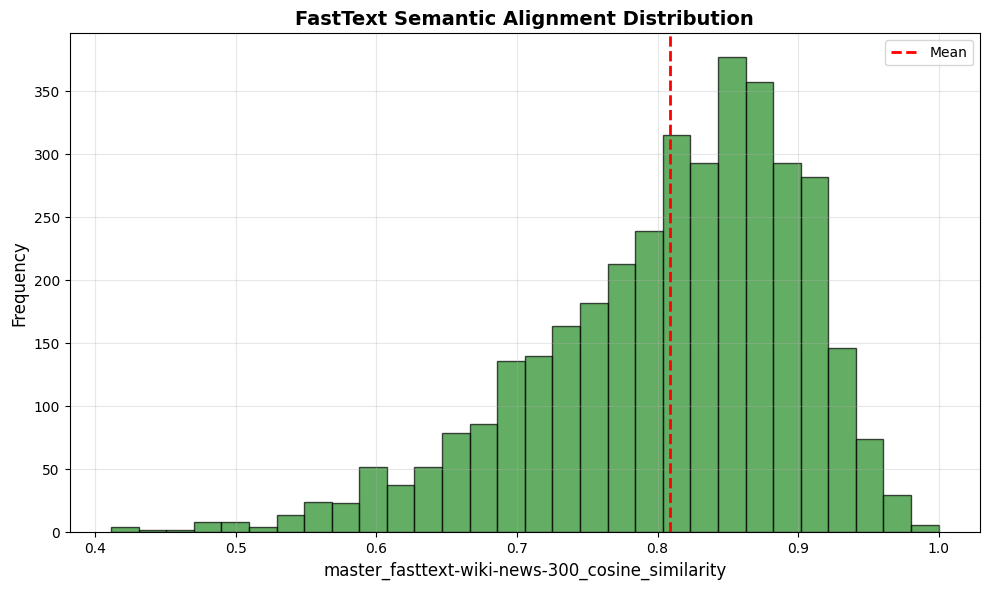


📊 Statistics for master_fasttext-wiki-news-300_cosine_similarity:
count    3643.000000
mean        0.808793
std         0.093898
min         0.411203
25%         0.756492
50%         0.826704
75%         0.877708
max         1.000000
Name: master_fasttext-wiki-news-300_cosine_similarity, dtype: float64


In [21]:
# Visualize FastText alignment
if fasttext_metrics:
    print("\n📈 Visualizing FastText Semantic Alignment")
    print("="*60)
    
    # Use the master similarity metric
    master_metric = [m for m in fasttext_metrics if 'master' in m.lower()]
    
    if master_metric:
        metric_name = master_metric[0]
        
        plt.figure(figsize=(10, 6))
        results_fasttext[metric_name].hist(bins=30, edgecolor='black', alpha=0.7, color='forestgreen')
        plt.title('FastText Semantic Alignment Distribution', fontsize=14, fontweight='bold')
        plt.xlabel(metric_name, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.axvline(results_fasttext[metric_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\n📊 Statistics for {metric_name}:")
        print(results_fasttext[metric_name].describe())

In [22]:
# TEST 4 Summary
print("\n" + "="*60)
print("TEST 4 SUMMARY")
print("="*60)

test4_passed = len(results_fasttext) > 0 and len(fasttext_metrics) > 0

if test4_passed:
    print("\n✓ TEST 4 PASSED: FastText semantic alignment works correctly!")
    print(f"\nKey Results:")
    print(f"  - Analyzed {len(results_fasttext)} utterance pairs")
    print(f"  - Found {len(fasttext_metrics)} FastText similarity metrics")
    if master_metric:
        print(f"  - Mean semantic similarity: {results_fasttext[master_metric[0]].mean():.4f}")
else:
    print("\n✗ TEST 4 FAILED: Issues detected")


TEST 4 SUMMARY

✓ TEST 4 PASSED: FastText semantic alignment works correctly!

Key Results:
  - Analyzed 3664 utterance pairs
  - Found 4 FastText similarity metrics
  - Mean semantic similarity: 0.8088


## TEST 5: Semantic Alignment with BERT


In [ ]:
print("="*60)
print("\n⚠️  Note: BERT requires Hugging Face token")
print("Set HUGGINGFACE_TOKEN environment variable or provide token parameter")
print("="*60)

token_available = 'HUGGINGFACE_TOKEN' in os.environ

if token_available:
    print("✓ Hugging Face token found in environment")
    print("Ready to test BERT!")
else:
    print("✗ Hugging Face token not found")
    print("\n" + "="*60)
    print("SETUP REQUIRED: Get a Hugging Face Token")
    print("="*60)

    print("\n📝 Step 1: Get a token")
    print("   Go to: https://huggingface.co/settings/tokens")
    print("   Click 'New token' → Copy token")

    print("\n📝 Step 2: Set the token permanently")
    print("   Add this line to ~/.zshrc (or ~/.bash_profile) in Terminal:")
    print("   export HUGGINGFACE_TOKEN='your_copied_token_here'")

    print("\n📝 Step 3: OPTIONAL: Restart Jupyter completely")
    print("   Quit Jupyter → Open NEW terminal → Start Jupyter again")

    print("\n" + "="*60)
    print("After setup, re-run this cell to verify.")
    print("="*60)




⚠️  Note: BERT requires Hugging Face token
Set HUGGINGFACE_TOKEN environment variable or provide token parameter
✓ Hugging Face token found in environment
Ready to test BERT!
